# Final Project - Breast Cancer Investigation

Tianran Zhang

The Github repository link for the code of this report is: https://github.com/Creatran/Final_Project.git

## 1. Abstract

This report focuses on the relationship between cell nuclei's features and patients' breast cancer diagnosis outcomes. I investigate the correlation between the 30 nuclei's features and only select the ones that do not have strong correlations with each other. I use PCA on the selected data to reduce the features' dimension. I apply k-means to cluster the patients according to their cell nuclei's features. Based on the clustering results, there is evidence support that the nuclei's features in the 'mean' and 'worst' group can explain the diagnosis outcome well. Furthermore, some patients might develop tumor recurrence after being cured of breast cancer. I conduct a two-sample t-test to compare the features' differences between patients with recurred breast cancer and those who did not. Based on the t-test, I conclude that the radius and perimeter features in the 'mean' and 'worst' group have a positive relationship towards tumor relapse, while the fractal dimension feature in the 'mean' group has a negative relationship with tumor relapse.

## 2. Introduction and background
### About the dataset
In this report, I concentrate on Wisconsin Diagnostic Breast Cancer (WDBC) dataset. Features in this dataset were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei presented in the image with 32 attributes. The dataset is available on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

Attributes:

1: Id number

2: Diagnosis: malignant; benign

3 - 32: ten real-valued features computed for each cell nucleus.

    a: radius

    b: texture (standard deviation of gray-scale values)

    c: perimeter

    d: area

    e: smoothness
    
    f: compactness
    
    g: concavity

    h: concave points

    i: symmetry

    j: fractal dimension

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is the Worst Radius.

### About the external data set
The external dataset I use is Wisconsin Prognostic Breast Cancer (WPBC) dataset, which also can be found at the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29). This dataset has 198 number of instances and 35 attributes. It contains the message of whether a patient developed disease recurrence or not and the recurrence time. 

Attributes:

1: Id number

2: Outcome: R = recur, N = nonrecur

3: Time: recurrence time if field 2 = R, disease free time if field 2 = N

4 - 33: ten real-valued features are computed for each cell nucleus, which is the same as field 3 - 32 in WDBC dataset.

34: Tumor size: diameter of the excised tumor in centimeters

35: Lymph node status: number of positive axillary lymph nodes.

### Research purpose
The research purpose for this project is to find out the relationship between the nuclei's features and patients' diagnosis outcome. If we could classify the patients with benign tumors and the patients with malignant tumors by their cell nuclei's features, then it will be possible to forecast the disease and prevent patients from breast cancer ahead of time by investigating their nuclei's features. Besides, disease recurrence is a common situation that about 20% of patients with breast cancer would develop it[1]. So, it is necessary to investigate the differences in the cell nuclei's features between patients who developed tumor relapse and those who did not.

### Three questions discussed in this project
1: Are there any nuclei's features that have strong correlations with each other? Try to reduce the dimension of the dataset by dropping these features. 

2: Can we classify the patients with breast cancer and those who do not by clustering their nuclei's features? If so, how well can the classification be?

3: Are there any differences in nuclei's features between patients with benign tumors and those who have malignant tumors? If so, specify the features and the direction of the differences. 

## 3. Methods
### Data cleaning
The WDBC dataset contains 569 patients' nuclei's features information without any missing values or outliers. The patients might be diagnosed with benign tumors(357) or malignant tumors (212). I divide the 30 nuclei's features into 3 groups with 10 features in each group.  The first group contains the mean values of the 10 real-valued features.  The second group contains the standard errors of the 10 real-valued features. The third group contains the worst (biggest) value of these features. The three groups will be denoted as the 'mean' group, the 'standard error' group, and the 'worst' group in the rest of this report. Now take a look at the description of all the features.

In [53]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code on/off"></form>''')

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

wdbc = pd.read_csv('wdbc.data', header = None)

# Rename the columns
wdbc.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
                'symmetry_mean', 'fractal dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
                'symmetry_se', 'fractal dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
                'symmetry_worst', 'fractal dimension_worst']
# wdbc.head()

In [50]:
# Divide the 30 features into 3 group: mean, standard error and worst group
features_mean = list(wdbc.columns[2:12])
features_se = list(wdbc.columns[12:22])
features_worst = list(wdbc.columns[22:32])

wdbc_features = wdbc.iloc[:, 2:32]
wdbc_diag = wdbc.iloc[:, 1:2]
wdbc_features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Normalize the features so they are all on the same scale.

In [16]:
wdbc_norm = (wdbc_features - wdbc_features.mean())/wdbc_features.std()

### Python libraries
Below are all the Python libraries used in the implementation:

- numpy: used for data calculation.

- matplotlib.pyplot: used for drawing plots.

- pandas: used for data manipulating.

- seaborn: used for drawing colormaps.

- sklearn.preprocessing.LabelEncoder: used for encode labels.

- sklearn.decomposition.PCA: used for PCA

- sklearn.cluster.KMeans: used for K-means clustering.

- scipy.stats: used for the t-test.

- scipy.special.stdtr: used for calculating standard error.

In [31]:
# import python packages

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

### Analysis methods 
For unsupervised learning, I use PCA to reduce the feature numbers. I use k-means (with k = 2) to cluster all the patients by their nuclei's features. 

For statistical analysis, I use the two-sample t-test to find out if there are differences in nuclei's features between patients who developed tumor recurrences and those who did not.

## 4. Results
### Question 1: Are there any nuclei's features that have strong correlations with each other? Try to reduce the dimension of the dataset by dropping these features.

First, take a look at the correlation heatmap.

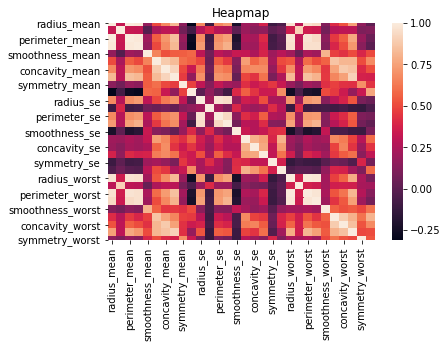

In [67]:
# Draw the Heapmap plot to show the correlation of features.
corr = wdbc_features.corr()
sns.heatmap(corr)
plt.title("Heapmap")
plt.show()

The heatmap shows that some features are strongly correlated with each other. For example, radius_mean, perimeter_mean and area_mean are strongly correlated with each other. It is not necessary to use all of them since one feature may present the same message with the other. 

In each group of strongly correlated features, randomly keep one of them and drop the others. Here, define two features are strongly correlated if they have a correlation coefficient of more than 0.9. After the dropping process, there are 20 features left that do not have strong correlations with each other. The following figure shows the distribution of all the selected features.

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)

# Drop the features with a strong correlation.
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
# Selected features that do not have a strong correlation with each other.
selected_columns = wdbc_features.columns[columns]
wdbc_Selected = wdbc_features[selected_columns]

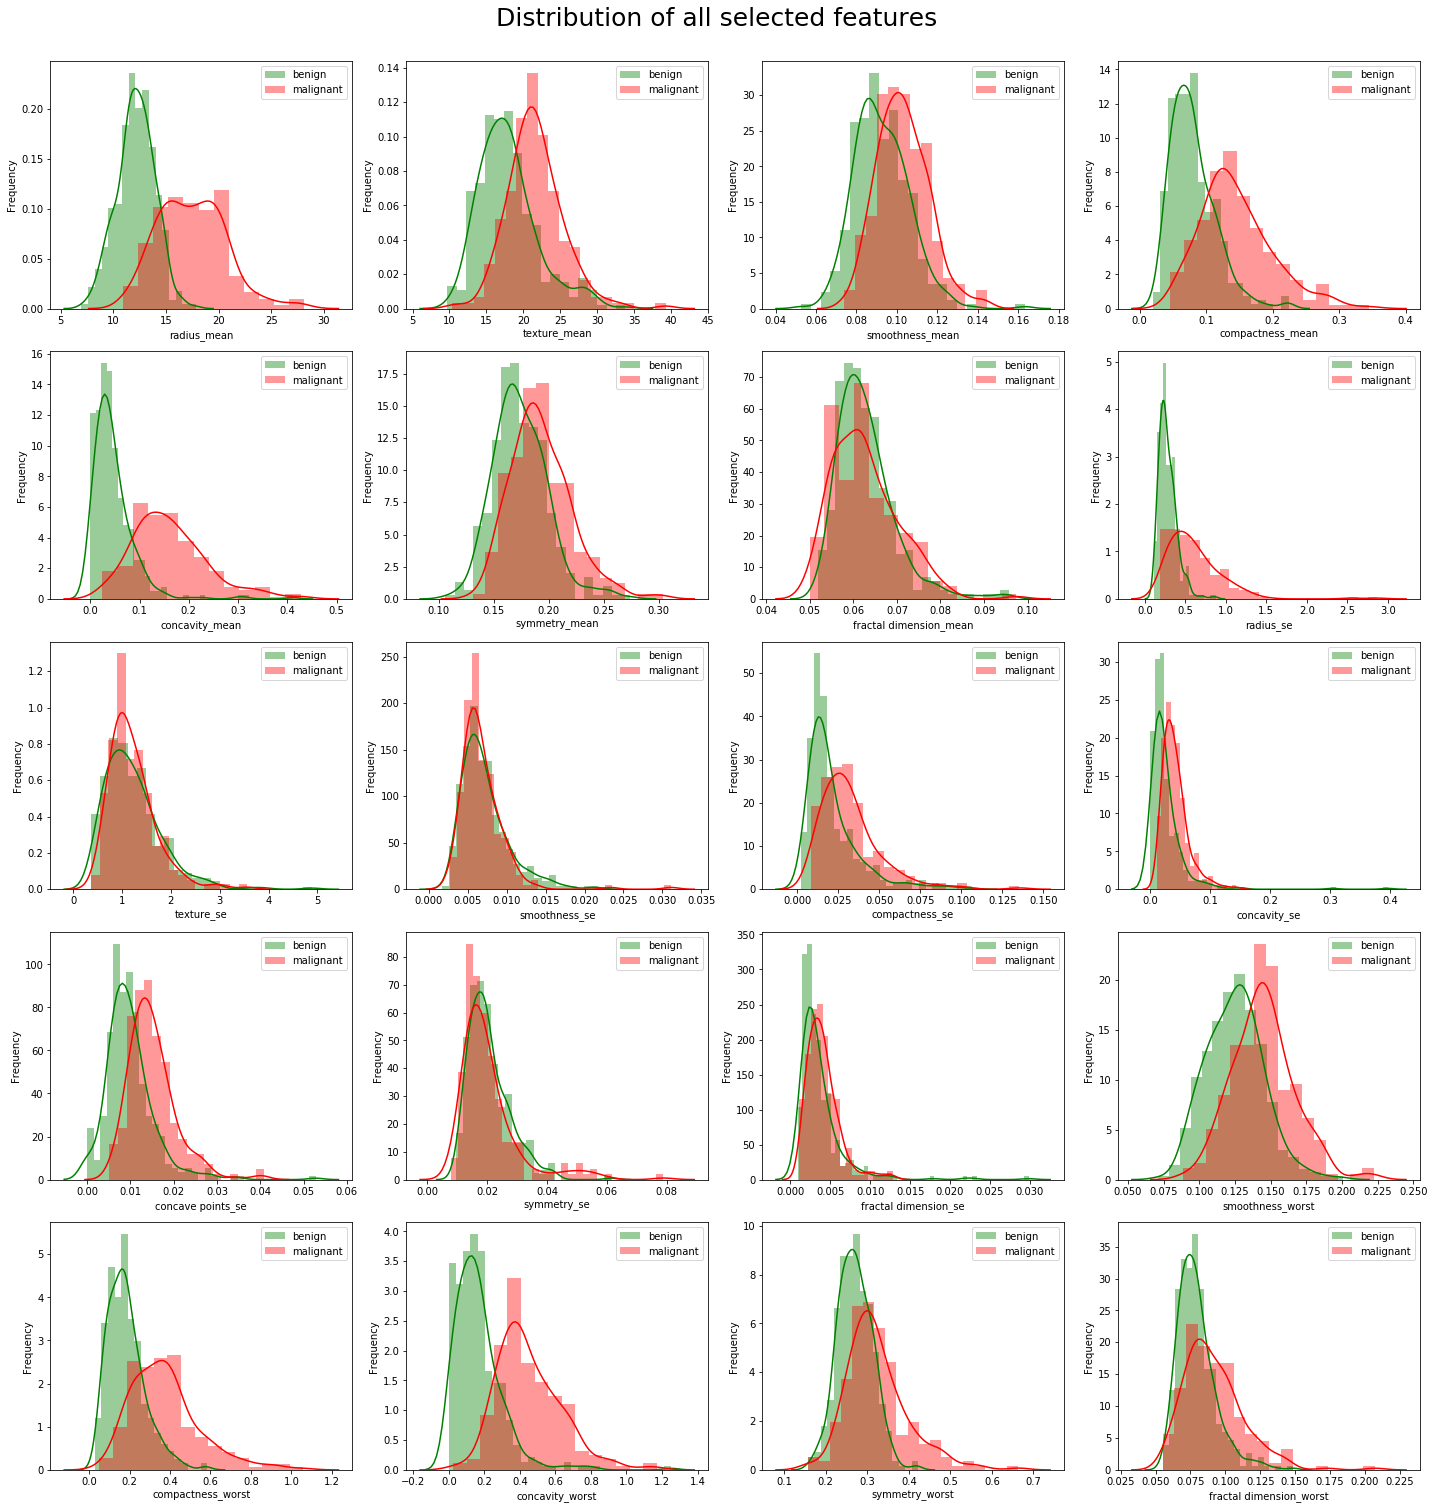

In [96]:
fig = plt.figure(figsize = (20, 25))

# Draw the distribution of all the selected 
j = 0
for i in wdbc_Selected.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(wdbc_Selected[i][wdbc['diagnosis']=='B'], color='g', label = 'benign')
    sns.distplot(wdbc_Selected[i][wdbc['diagnosis']=='M'], color='r', label = 'malignant')
    plt.legend(loc='best')
    plt.ylabel("Frequency")
fig.suptitle('Distribution of all selected features', fontsize = 25)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

As shown in the plots, some features have little contribution to tumor classification. For example, the texture_se, smoothness_se, symmetry_se, fractal dimension_se features' distribution is approximately the same in patients with benign tumors and malignant tumors. Such features do not attribute much to the classification.

So, I apply PCA on the selected data to further reduce the dimension of the data. Draw the variance explained_ratio plot by the PCs. Approximately 2 PCs can explain more than 95% of the variance in the data, so I choose 2 components for PCA.

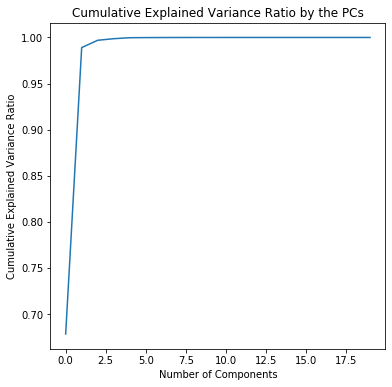

In [104]:
wdbc_y = wdbc_diag.replace(['M', 'B'], [1, 0])

# Do PCA on the selected features and note down the runtime.
pca2 = PCA()
pca2.fit(wdbc_Selected)

# Draw the cumulative explained variance plot to find out the best number for clustering
plt.figure(figsize = (6, 6))
plt.plot(np.arange(len(pca2.explained_variance_ratio_)), np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title('Cumulative Explained Variance Ratio by the PCs')
plt.show()

Plot the scores on the first versus the second principal component, and color the scores by the diagnosis outcome. 

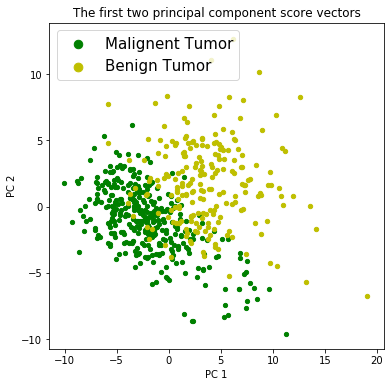

In [107]:
# Do PCA with the number of components = 2
pca3 = PCA(n_components = 2)
LE = LabelEncoder()
pca3_scores = pca3.fit_transform(wdbc_Selected)


# plot the first two principal component score vectors. 
# Use a different color to indicate different diagnosis outcomes.
plt.figure(figsize = (6, 6))
ax = plt.gca()
ax.scatter(pca3_scores[:, 0][wdbc_y["diagnosis"] == 0], pca3_scores[:, 1][wdbc_y["diagnosis"] == 0], 
           c = 'g', s = 18, label = "Malignent Tumor")
ax.scatter(pca3_scores[:, 0][wdbc_y["diagnosis"] == 1], pca3_scores[:, 1][wdbc_y["diagnosis"] == 1], 
           c = 'y', s = 19, label = "Benign Tumor")
ax.legend(markerscale = 2, fontsize = 15)    

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("The first two principal component score vectors")
plt.show()

We can see from the plot that the main parts of the two clusters are separated and do not overlap much with each other. So, it is possible to use the features to classify the tumor types.

To answer this question, I summarise the features that have strong correlations with each other. I select the features that have strong correlations with each other and drop the others. I also apply PCA on the selected features to further reduce the dimension. The first versus the second principal component plot displays two clusters that do not have much overlap, which means that we could use these features for classification. 

### Question 2: Can we classify the patients with breast cancer and those who do not by clustering their nuclei's features? If so, how well can the classification be?

I apply k-means clustering on the selected dataset and compute the classification correct rate. Here I define the classification correct rate as the number of patients with the same type of tumor that are clustered in the same group divided by the total number of patients.

In [100]:
# Do k-means clustering on all the features
kmeans = KMeans(n_clusters = 2)
kmeans.fit(wdbc_norm)
y_kmeans = kmeans.predict(wdbc_norm)

print("Overall classification correct rate: ", 1 - sum(abs(y_kmeans  - wdbc_y['diagnosis']))/len(y_kmeans))

Overall classification correct rate:  0.9103690685413005


The following figure shows the classification outcome more clearly. The yellow dots represent the correctly clustered patients, while the red dots indicate that these patients are misclassified in the wrong group. By 'correctly clustered', I refer to the patients with the same type of tumors that are clustered in the same group.

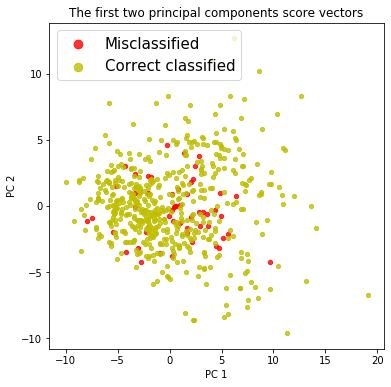

In [90]:
# Plot the classification outcome. 

plt.figure(figsize = (6, 6))
ax = plt.gca()
ax.scatter(pca3_scores[:, 0][wdbc_y["diagnosis"] - y_kmeans == 0], 
           pca3_scores[:, 1][wdbc_y["diagnosis"] - y_kmeans == 0], 
           c = 'r', s = 19, label = "Misclassified", alpha = 0.8)
ax.scatter(pca3_scores[:, 0][wdbc_y["diagnosis"] - y_kmeans != 0], 
           pca3_scores[:, 1][wdbc_y["diagnosis"] - y_kmeans != 0], 
           c = 'y', s = 18, label = "Correct classified", alpha = 0.8)
ax.legend(markerscale = 2, fontsize = 15)    

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("The first two principal components score vectors")
plt.show()

The classification correct rate is higher than 90%. So, the classification is very successful. To further investigate, I apply k-means clustering on the three groups respectively and compare the results.

In [101]:
# Do k-means clustering on all 'mean' features in group 1.

kmeans_mean = KMeans(n_clusters = 2)
kmeans_mean.fit(wdbc_norm[features_mean])
y_kmeans_mean = kmeans_mean.predict(wdbc_norm[features_mean])
print("Group 1 classification correct rate: ", 1 - sum(abs(y_kmeans_mean  - wdbc_y['diagnosis']))/len(y_kmeans_mean))

Group 1 classification correct rate:  0.9033391915641477


In [102]:
# Do k-means clustering on all 'se' features in group 2.

kmeans_se = KMeans(n_clusters = 2)
kmeans_se.fit(wdbc_norm[features_se])
y_kmeans_se = kmeans_se.predict(wdbc_norm[features_se])
print("Group 2 classification correct rate: ", 1 - sum(abs(y_kmeans_se  - wdbc_y['diagnosis']))/len(y_kmeans_se))

Group 2 classification correct rate:  0.7275922671353252


In [103]:
# Do k-means clustering on all 'worst' features in group 3.

kmeans_worst = KMeans(n_clusters = 2)
kmeans_worst.fit(wdbc_norm[features_worst])
y_kmeans_worst = kmeans_worst.predict(wdbc_norm[features_worst])
print("Group 3 classification correct rate: ", 1 - sum(abs(y_kmeans_worst  - wdbc_y['diagnosis']))/len(y_kmeans_worst))

Group 3 classification correct rate:  0.9226713532513181


The above classification results show that group1('mean' group) and group3(worst group) have a better classification rate than group2. The classification correct rate for group 1 and group 3 are both higher than 90. So, it is rational to assume that the diagnosis outcome has a stronger relationship with the mean and the worst value of tumors.

To answer the second question, I cluster all the patients into two groups by their cell nuclei's features. By comparing the classification results and the true type of a tumor, I find out that most of the tumors with the same type are classified in one group. The classification correct rate is higher than 90%. Besides, the classification correct rate in group 1 and group 3 are both higher than 90, which means the features in these two groups have stronger relationships with the diagnosis outcomes.

### Question 3: Are there any differences in nuclei's features between patients with benign tumors and those who have malignant tumors? If so, specify the features and the direction of the differences. 

The external dataset WPBC contains the follow-up record for patients diagnosis with breast cancer. Some patients developed disease recurrence(104 patients) while some do not(35 patients).

Merge the the WPBC and WDBC dataset and draw the distribution plot for the recurrence time (or disease free time).

In [39]:
# Merge the two dataset.

wpbc = pd.read_csv('wpbc.data', header = None)
wpbc.columns = ['id', 'outcome', 'time', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal dimension_mean', 'radius_sd', 'texture_sd', 'perimeter_sd', 'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave points_sd', 'symmetry_sd', 'fractal dimension_sd', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal dimension_worst', 'tumor size', 'lymph node status']

wpbc_outcome = wpbc.iloc[:, 0:3]
merged_data = pd.merge(wpbc_outcome, wdbc, on = 'id')
merged_data['outcome'] = merged_data['outcome'].replace(['R', 'N'], [0, 1])
merged_data['diagnosis'] = merged_data['diagnosis'].replace(['M', 'B'], [1, 0])

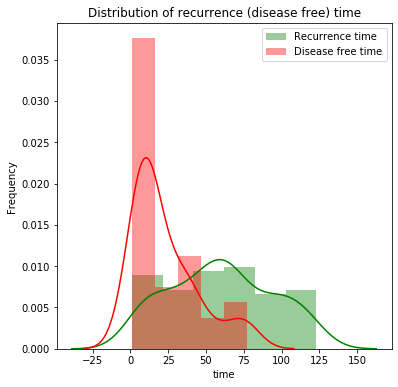

In [62]:
# Draw the distribution plot recurrence time and disease free time.
rec = merged_data['time'][merged_data.outcome == 1]
notrec = merged_data['time'][merged_data.outcome == 0]

plt.figure(figsize = (6, 6))
sns.distplot(rec, color='g', label = 'Recurrence time')
sns.distplot(notrec, color='r', label = 'Disease free time')
plt.title("Distribution of recurrence (disease free) time")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()

The plot shows that the the mean value for disease free time time is greater than that of recurrence time.

Devide the merged dataset into two group. One group of patients with cancer recurrence and the other group of patients did not develop tumor relapse. Develope a significant test on the two groups for each feature.

Null hypothesis: There is no difference on the feature between the two groups of patients.
Alternative hypothesis: There is a difference on the feature between the two groups of patients.
Set alpha = 0.05. Apply two-sample t-test on the features' differences between the two groups of patients. Select the features with a p-value less than 0.05.

In [42]:
# Group the data by recurrence outcome
group1 = merged_data[merged_data.outcome == 0][merged_data.columns[2:]]
group2 = merged_data[merged_data.outcome == 1][merged_data.columns[2:]]

# Do t-test on the two groups with each feature
t = pd.DataFrame()
for i in merged_data.columns[2:]:
    a, b = ttest_ind(group1[i], group2[i])
    if b < 0.05:
        t[i] = a, b, group1[i].mean() - group2[i].mean()
        
t = t.rename(index = {0: 'test_statistics', 1: 'p_value', 2: 'Diff in mean'})
t

,time,radius_mean,perimeter_mean,area_mean,fractal dimension_mean,radius_worst,perimeter_worst,area_worst
test_statistics,-6.100465e+00,3.296876,3.235697,3.359512,-2.143596,3.952183,3.941875,4.057704
p_value,1.018632e-08,0.001245,0.001521,0.001012,0.033831,0.000124,0.000128,0.000083
Diff in mean,-3.703764e+01,2.026503,13.520527,233.810302,-0.002888,3.045937,20.689959,413.596236


Shown from the result table, time, radius_mean, perimeter_mean, area_mean, fractal dimension_mean, radius_worst, perimeter_worst and area_worst show significant differences between the two groups. The directions for fractal dimension_mean and time are negative (the values of features in the non-recurrence group are less than that in the recurrence group). The directions for the other features are positive (the values of features in the non-recurrence group are higher than that in the recurrence group). 

So, the radius and perimeter features in the 'mean' and 'worst' group have a positive relationship towards tumor relapse, while the fractal dimension feature in the 'mean' group has a negative relationship with tumor relapse.

## 5. Conclusion
Several conclusions from different aspects can be drawn based on the above analysis. Firstly, we could reduce the dimension of a dataset by dropping the features that have a strong correlation with the others as well as PCA. Sometimes PCA is a good way to help us visualize the data when the original dataset is in a high dimension. Besides, features in the 'mean' group and the 'worst' group have a stronger relationship with breast cancer diagnosis outcome. So these features need more concentration in further studies. Finally, based on the two-sample t-test, the radius and perimeter features in the 'mean' and 'worst' group have a positive relationship towards tumor relapse, while the fractal dimension feature in the 'mean' group has a negative relationship with tumor relapse.

## Reference

[1] Bedognetti, D., Hendrickx, W., Marincola, F. M., & Miller, L. D. (2015). Prognostic and predictive immune gene signatures in breast cancer. Current opinion in oncology, 27(6), 433-444.

## Appendix - Exploratory Data Analysis

1. Group the data by diagnosis and find out that we have 357 patients in the benign group and 212 patients in the malignant group.

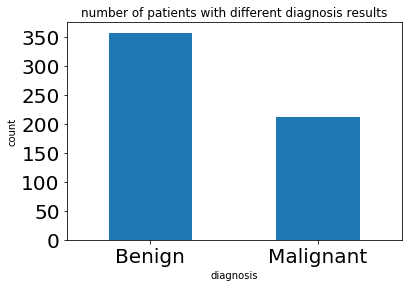

In [43]:
# Group the data by diagnosis and count the number in each group.
wdbc.groupby('diagnosis').size().plot(kind = 'bar', fontsize = 20)
plt.xticks(rotation = 0)
ax = plt.gca()
ax.set_xticklabels(['Benign', 'Malignant'])
plt.ylabel('count')
plt.title('number of patients with different diagnosis results')
plt.show()

2. Use boxplots to show and compare the distributions of the 10 features in each group. 

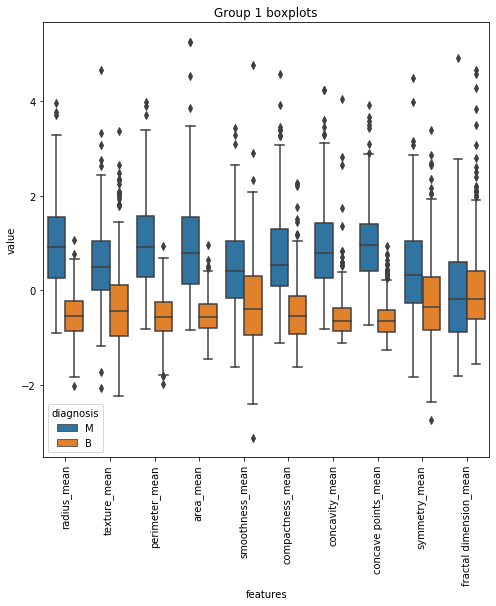

In [55]:
# Draw boxplot for Group 1 features.

plt.figure(figsize = (8, 8))
data1 = pd.concat([wdbc_diag, wdbc_norm[features_mean]], axis=1)
data1 = pd.melt(data1, id_vars='diagnosis', var_name = 'features', value_name = 'value')
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = data1)
plt.xticks(rotation = 90)
plt.title('Group 1 boxplots')
plt.show()

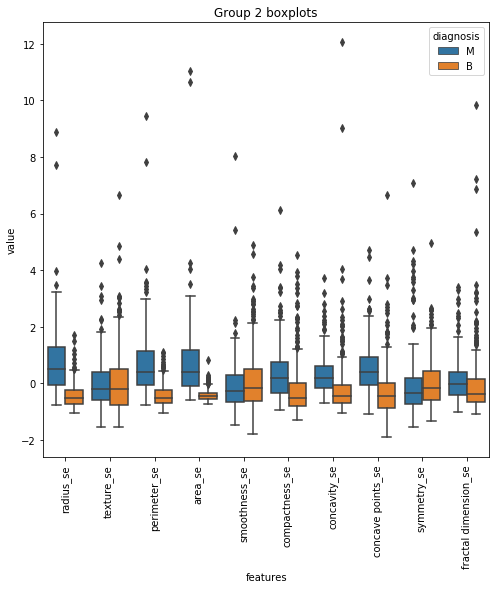

In [56]:
# Draw boxplot for Group 2 features.

plt.figure(figsize = (8, 8))
data2 = pd.concat([wdbc_diag, wdbc_norm.iloc[:, 10: 20]], axis=1)
data2 = pd.melt(data2, id_vars='diagnosis', var_name = 'features', value_name = 'value')
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = data2)
plt.xticks(rotation = 90)
plt.title('Group 2 boxplots')
plt.show()

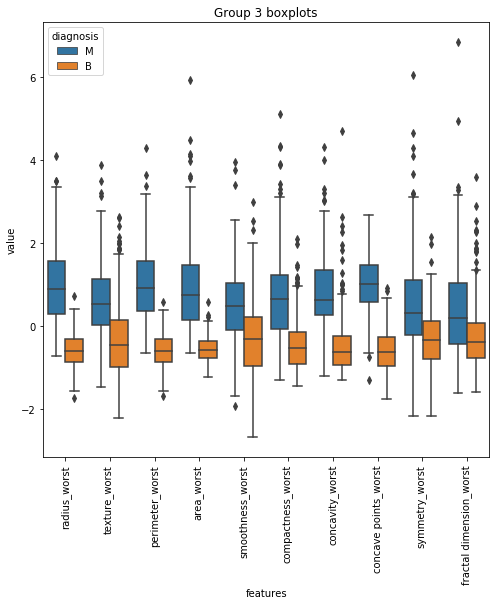

In [57]:
# Draw boxplot for Group 3 features.

plt.figure(figsize = (8, 8))
data3 = pd.concat([wdbc_diag, wdbc_norm.iloc[:, 20: 31]], axis=1)
data3 = pd.melt(data3, id_vars='diagnosis', var_name = 'features', value_name = 'value')
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = data3)
plt.xticks(rotation = 90)
plt.title('Group 3 boxplots')
plt.show()

From the boxplots above, I notice that some features look similar. For example, symmetry_worst and fractal dimension_worst in group 3. But how can we decide which features have a strong correlation with each other? If some features are strongly correlated with each other, we can just keep one of them and drop the others. This is my first question raise from the boxplot.

3 Use swarmplots to compare the distributions and variances of these features.

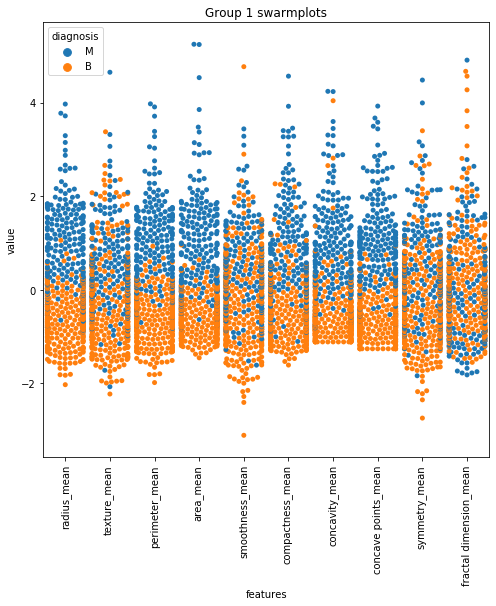

In [58]:
# Draw swarmplot for Group 1 features.

plt.figure(figsize = (8, 8))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data1)
plt.xticks(rotation = 90)
plt.title('Group 1 swarmplots')
plt.show()

The swarm plots can show the variance of the features clearly. To interpret the plot above, in the swarm plot of radius_mean, texture_mean, perimeter_mean, area_mean, concavity_mean, and concave points_mean, the median values for the malignant tumors and benign tumors look like separated. So, these features might be good for classification. Whereas in the swarm plot of smoothness_mean, compactness_mean, symmetry_mean, and fractal_dimension_mean, the median values for the malignant tumors and benign tumors look not separated. So, these features night not provide enough information for classification.

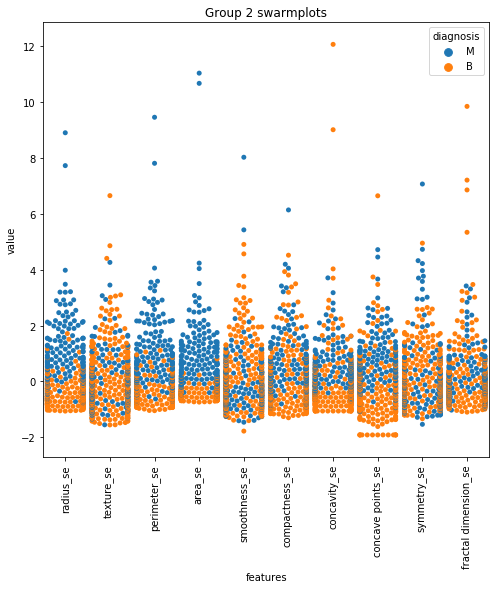

In [59]:
# Draw swarmplot for Group 2 features.

plt.figure(figsize = (8, 8))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data2)
plt.xticks(rotation = 90)
plt.title('Group 2 swarmplots')
plt.show()

To interpret the plots above for group 2, in the swarm plots of radius_se, perimeter_se, area_se, and concave points_se, the median values for the malignant tumor and the benign tumor look like separated. So these features can be good for classification. Whereas in the swarm plots of texture_se, smoothness_se, compactness_se, concavity_se, symmetry_se, and fractal_dimension_se, the median values for the malignant tumor and the benign tumor look not separated. So these features do not provide enough information for classification.

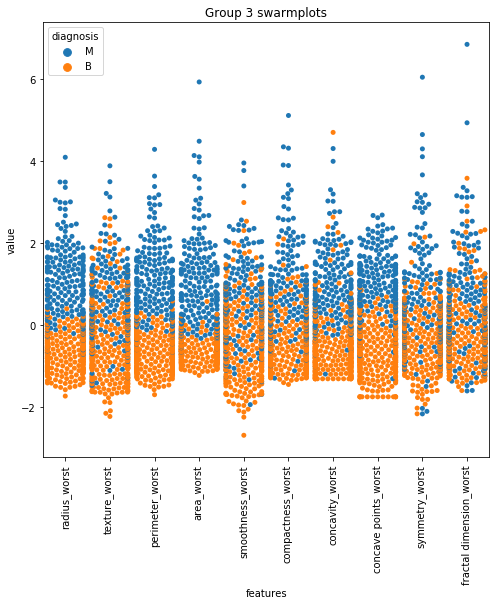

In [60]:
# Draw swarmplot for Group 3 features.

plt.figure(figsize = (8, 8))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data3)
plt.xticks(rotation = 90)
plt.title('Group 3 swarmplots')
plt.show()

To interpret the plots above for group 3, in the swarm plots of radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst, and symmetry_worst, the median values for the malignant tumor and benign tumor look like separated. So these features can be good for classification. Whereas in the swarm plot of texture_worst, smoothness_worst, and fractal_dimension_worst, the median value for the malignant tumor and benign tumor look like not separated. So these features do not provide enough information for classification.

In conclusion, some features look like they provide little information in the classification. So, we can drop these features to simplify and also improve the accuracy of the classification. We can use PCA to select the most helpful features.